# Boletín 6: Capítulos 3.1 y 3.2
## Tipos de Problemas, Formulación, Datos y Sesgo

**Objetivo:** Dominar la formulación de problemas de ML y entender cómo el sesgo en datos arruina modelos.

**Instrucciones:**
- 10 ejercicios ordenados por dificultad
- 🟢 = Básico | 🟡 = Intermedio | 🔴 = Avanzado


---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, 
                             recall_score, f1_score, mean_absolute_error, 
                             mean_squared_error, r2_score)
from sklearn.model_selection import train_test_split, GroupShuffleSplit
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Configuración visual
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ Librerías listas")

✓ Librerías listas


## 🟢 Ejercicio 1: Clasificación de Problemas de ML

Para cada escenario, identifica el **tipo** (Supervisado/No supervisado/Por refuerzo) y el **subtipo**.

1. Predecir si un cliente comprará después de ver un anuncio
2. Agrupar clientes en 5 segmentos según comportamiento
3. Entrenar un robot para navegar un laberinto
4. Predecir el precio de una casa
5. Detectar emails spam

In [ ]:
# Tu respuesta aquí

# 1. Este es una escena de aprendizaje supervisado, más concretamente del subtipo clasificación binaria. El algoritmo se entrena con un conjunto de datos historicos donde ya sabemos si otros clientes compraron o no. Al ser un conjunto con dos respuestas cerradas con dos opciones posibles es clasificación binaraia. El modelo busca una decision que separe los grupos.

# 2. En este caso pienso que es un aprendiza No supervisado ya que no le estamo diciendo al algoritm que buscar ni los grupos que existen previamente. El modelo analiza varable como frecuencia para encontrar patrones de similitud de forma autonoma. Su claro objetico es maximizar la semejanza interna de cada grupo y la diferencia entre ellos. El sub tipo es CLustering, el algoritmo busca similitudes

# 3. En este escenario aplicamos Aprendizaje por refuerzo, porque el aperndizaje se baas en la interaccion dinámica entre un agente y su entorno. No hay un conjunto de datos estáticos: en su lugar, el robot y su entorno recibe una recompensa positiva cuando se acerca a la salida y una negativa cuando choca. Por ensayo y error optimiza las acciones para maximizar el beneficio a largo plazo.

# 4. Se caracteriza por Aprendiza supervisado, el subtipo de Regresisión, debido a que el objetivo es predecir un valor númerico continuo en una escala enfinita. Buscando una función matemática que relaciona variables con un precio espefífico, intentando o minimizando el error entre la prediccíon y el valor real del mercado.

# 5. Aprendizaje supervisado concretamente clasificación. El sistema necesita entrenamiento previo donde se le muestra los correos marcados manualmente como spam. A partir de ahi, el modelo aprende identificar palabras claves como metadatos o estructuras mas comunes para los nuevos correos entrantes.


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: C:\Users\Ale\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


## 🟢 Ejercicio 2: Métricas de Regresión vs Clasificación (con código)

En el capítulo 3.1 vimos que regresión y clasificación usan **métricas diferentes**. Practica calculándolas.

**Parte A – Regresión** (predicción de precio de casas en miles de €):

```python
y_real_reg = np.array([200, 350, 150, 420, 300, 180, 500, 275])
y_pred_reg = np.array([210, 330, 160, 400, 310, 190, 480, 260])
```

1. Calcula **MAE** (Mean Absolute Error) con numpy: `np.mean(np.abs(...))`
2. Calcula **RMSE** (Root Mean Squared Error) con numpy: `np.sqrt(np.mean(...))`
3. Calcula **R²** con numpy usando la fórmula: $R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$
4. Verifica tus resultados con sklearn (`mean_absolute_error`, `mean_squared_error`, `r2_score`)

**Parte B – Clasificación** (detección de spam: 0=legítimo, 1=spam):

```python
y_real_clf = np.array([0, 0, 1, 1, 0, 1, 0, 1, 1, 0])
y_pred_clf = np.array([0, 1, 1, 0, 0, 1, 0, 1, 0, 0])
```

5. Calcula **Accuracy**, **Precision**, **Recall** y **F1** con sklearn
6. Construye la **matriz de confusión** e interprétala
7. ¿Qué métrica priorizarías para spam y por qué?

In [2]:
# --- Parte A: Regresión ---
y_real_reg = np.array([200, 350, 150, 420, 300, 180, 500, 275])
y_pred_reg = np.array([210, 330, 160, 400, 310, 190, 480, 260])

# Tu código aquí (calcula MAE, RMSE, R² con numpy y verifica con sklearn)
# MAE 
mae = np.mean(np.abs(y_pred_reg - y_pred_reg))
rmse = np.sqrt(np.mean((y_real_reg - y_pred_reg)**2))
r2 = 1 - (np.sum((y_real_reg - y_pred_reg)**2) / np.sum((y_real_reg - np.mean(y_real_reg))**2))


# --- Parte B: Clasificación ---
y_real_clf = np.array([0, 0, 1, 1, 0, 1, 0, 1, 1, 0])
y_pred_clf = np.array([0, 1, 1, 0, 0, 1, 0, 1, 0, 0])

print(f"Accuracy: {accuracy_score(y_real_clf, y_pred_clf)}")
print(f"Precision: {precision_score(y_real_clf, y_pred_clf)}")
print(f"Recall: {recall_score(y_real_clf, y_pred_clf)}")
print(f"Confusión:\n{confusion_matrix(y_real_clf, y_pred_clf)}")

Accuracy: 0.7
Precision: 0.75
Recall: 0.6
Confusión:
[[4 1]
 [2 3]]


## 🟡 Ejercicio 3: Formulación Precisa de Problemas

Traduce estas formulaciones **vagas** en formulaciones **precisas** especificando:
- QUÉ se predice
- CUÁNDO (ventana temporal)
- PARA QUÉ (decisión de negocio)
- QUÉ CUESTA (error más costoso)

**Formulación vaga 1:** "Queremos predecir si un cliente va a dejar la compañía"


**Formulación vaga 2:** "Necesitamos detectar fraude en transacciones"

In [ ]:
# Tu respuesta aquí
# **Formulación vaga 1:** "Queremos predecir si un cliente va a dejar la compañía"
# - QUÉ se predice -> La prbablidad valores de 0 a 1, de que un cliente con contrato activo pase a baja. O no renueve su suscripción
# - CUÁNDO (ventana temporal)--> Unos 30 dias, debido es que tenemos que tener margen para tener tiempo de reaccionar
# - PARA QUÉ (decisión de negocio)--> activar una campañ de retencion, planes de descuento, mejoras de plan. Siempre dirigido a clientes con riesgo de baja.
# - QUÉ CUESTA (error más costoso)->Un falso negativa, que es predecir que el cliente se queda pero realmente se va. Conseguir uno nuevo es más costoso de que uno se vaya. Tenemos que visualizar y predecir correctamente o actuar para no perder dicho cliente.

# **Formulación vaga 2:** "Necesitamos detectar fraude en transacciones"
# - QUÉ se predice --> predecir si una tarjeta de credito es legitima o fraudulenta.
# - CUÁNDO (ventana temporal) --> En tiempo real, justo cuando el cliente va a hacer el pago.
# - PARA QUÉ (decisión de negocio) -->Para bloquear automaticamente el pago sospechoso y enviar una notificación al movil del usuario pidiendo codigo de seguridad o identidad.
# - QUÉ CUESTA (error más costoso) --> El problema es tremendo deido que es muy costo en terminos de marca es el falso positivo (bloquear tarjeta a un cliente legitimo que está intentando pagar con su tarjeta) puede generar una frustración eeorme y puede hacer que el cliente deje de usar tu tarjeta. Sin embargo, si el fraude es masivo Falso negativo, impacta directamente en las finanzas del banco.

## 🟡 Ejercicio 4: Cálculo de ROI de Proyecto de ML

Se propone un proyecto para automatizar aprobación de créditos.

**Datos:**
- Inversión: 50,000€
- Volumen: 10,000 solicitudes/mes
- Objetivo: Automatizar 70% (7,000/mes)
- Costo actual (manual): 5€/solicitud
- Costo futuro (automatizado): 0.50€/solicitud
- Ingresos por solicitud: 200€

**Tareas:**
1. Ahorro mensual en costos
2. Ingresos adicionales (si mantiene tasa aprobación)
3. ROI a 6 meses
4. ¿Viable? ¿Qué otros factores considerar?

In [ ]:
# Tu código aquí
# 1. Ahorro mensual en costos CALCULADO PARA 100 SOLICITUDES
Costo manual actual(70 solicitudes): 70 * 5 = 350
Costo automatizado futuro: 100 * 0.50 = 35
Ahorro Mensual: 350 - 35 = 315/mes
# 2. Ingresos adicionales (si mantiene tasa aprobación)
Asumiendo que mantenemos la misma tasa de aprobación, los ingreso por esas 70 solicitudes son de 14000. Sin embargo el ahorro en gestión es de solo 315€.
# 3. ROI a 6 meses
Ahorro total en 6 meses: 315 * 6 = 1890
Inversión inicial: 50,000
Beneficio Neto: 1,890 - 50000 = -48.110 (Pérdidas)
Cálculo de ROI: -48.110/50.000 *100 =-96.22%


# 4. ¿Viable? ¿Qué otros factores considerar?
Con este volumen de datos, el proyecto es una pérdida de dinero casi total en el corto plazo.

SyntaxError: invalid character '€' (U+20AC) (4260507944.py, line 7)

## 🟡 Ejercicio 5: Sesgo de Selección en Créditos

Se entrena modelo para predecir aprobación de crédito. Dataset:
- 1000 clientes que **recibieron crédito**
- 0 clientes que **fueron rechazados**

**Preguntas:**
1. ¿Hay sesgo de selección? ¿Por qué?
2. ¿Qué grupo NO está representado?
3. ¿Qué problema en producción?
4. 3 soluciones posibles

In [ ]:
# Tu respuesta aquí
1. Sí, ha gran escala o de forma masiva. Este sego ocurre cunado la muestra utilizada para entrenar el modelo no es representativa de la poblacion real. Por lo que el modelo solo está viendo una imagen parcial de la realidad. Las personas que pasaron ya un filtro.
2.Los clientes rechazados. Para que el modelo haga diferencias tiene que ver ejemplos de ambos. Al no tener los datos de personas a las que se deneg el credito, el modelo no conoce las características del rechazo o impago
3.El modelo sufre una incapacidad para generalizar. En la producción, cuando llegue un perfil de riesgo alto, el modelo puede aprobarlo simplemente porque nunca aprendio a decir que no. solo ha visto casos de exito.
4. A. Buscar en los archivos de la empresa las solicitudes que fueron denegadas manualmente en el pasado e incluirlas en el dataset de entrenamiento con la etiqueta "Rechazado"
B.Se pueden generar perfiles hipotéticos basados en reglas de negocio conocidas, para "enseñarle" al modelo qué perfiles no son deseables.

## 🟡 Ejercicio 6: Desbalanceo de Clases — Del Problema a la Solución

El capítulo 3.2 explica que el desbalanceo de clases engaña con métricas como accuracy. Pero más importante: muestra **cómo solucionarlo**.

**Parte A – El engaño del modelo ingenuo:**
1. Con el dataset proporcionado, crea predicciones que siempre digan "legítima" (clase 0). Calcula accuracy, precision, recall, F1
2. ¿Por qué accuracy es engañoso aquí?

**Parte B – Tres estrategias de solución:**
3. Entrena `LogisticRegression()` sin ajustes y evalúa con F1 y recall
4. Entrena con `class_weight='balanced'` y compara
5. Aplica `SMOTE` al conjunto de train, entrena y compara

**Parte C – Comparación:**
6. ¿Qué estrategia da mejor **F1**? ¿Y mejor **recall**?
7. Si cada fraude no detectado cuesta 1000€ y cada falsa alarma cuesta 5€, ¿qué estrategia elegirías?

In [ ]:
# Dataset de fraude desbalanceado
rng = np.random.default_rng(42)
n_normal, n_fraude = 9900, 100

X_normal = rng.normal(loc=[50, 12], scale=[15, 3], size=(n_normal, 2))
X_fraude = rng.normal(loc=[80, 2], scale=[20, 1], size=(n_fraude, 2))

X = np.vstack([X_normal, X_fraude])
y = np.array([0]*n_normal + [1]*n_fraude)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Train: {len(y_train)} muestras ({(y_train==1).sum()} fraudes)")
print(f"Test:  {len(y_test)} muestras ({(y_test==1).sum()} fraudes)")

# Tu código aquí

# PARTE A:Predecir siempre 0 ---
y_naive = np.zeros_like(y_test)

#PARTE B: Estrategias de Solución ---

# Estrategia sin ajustes
model_base = LogisticRegression()
model_base.fit(X_train_scaled, y_train)
y_pred_base = model_base.predict(X_test_scaled)

# Estrategia ajuste de pesos (Class Weight Balanced)
model_balanced = LogisticRegression(class_weight='balanced')
model_balanced.fit(X_train_scaled, y_train)
y_pred_balanced = model_balanced.predict(X_test_scaled)

# --- PARTE C: Evaluación y Comparacion ---
def evaluar(nombre, y_real, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_real, y_pred).ravel()
    # Coste: 1000€ por cada fraude no detectado (FN), 5€ por falsa alarma (FP)
    coste = (fn * 1000) + (fp * 5)
    
    return {
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_real, y_pred),
        "F1-Score": f1_score(y_real, y_pred),
        "Recall": recall_score(y_real, y_pred),
        "Coste Total (€)": coste
    }

res_naive = evaluar("Ingenuo (Todo 0)", y_test, y_naive)
res_base = evaluar("Base (Sin ajuste)", y_test, y_pred_base)
res_balanced = evaluar("Balanced Weights", y_test, y_pred_balanced)

#tabla comparativa
df = pd.DataFrame([res_naive, res_base, res_balanced])
print(df.to_string(index=False))

Train: 7000 muestras (70 fraudes)
Test:  3000 muestras (30 fraudes)
           Modelo  Accuracy  F1-Score   Recall  Coste Total (€)
 Ingenuo (Todo 0)  0.990000  0.000000 0.000000            30000
Base (Sin ajuste)  0.998667  0.935484 0.966667             1015
 Balanced Weights  0.989333  0.652174 1.000000              160


## 🟡 Ejercicio 7: Data Leakage - Identificar Problemas

Modelo para predecir **7 días antes** si cliente cancela. Variables:
- edad, ingresos, antigüedad (características estables)
- dias_sin_usar_app
- fecha_ultima_cancelacion_servicio
- llamadas_servicio_cliente_ultimasSemana
- target: Canceló en próximos 7 días

**Preguntas:**
1. ¿Qué es data leakage?
2. ¿Hay leakage? ¿Qué variables?
3. Explica POR QUÉ cada una es problemática
4. Cómo reestructurar para evitar leakage

In [ ]:
# Tu análisis aquí
# 1. ¿Qué es data leakage?
Es cuando se introduce unformación del target, lo que queremos predecir, en el conjunto de datos de entrenamientos de forma accidental. Ocurre cuando utilizamos datos que en el momento de realizar la prediccion en la vida real, no estarian disponibles. Es perfecto en la práctica o papel pero  falla en la produción.
# 2. ¿Hay leakage? ¿Qué variables?
Sí, hay un leakage. Las variables problemáticas son:fecha_ultima_cancelacion_servicio, llamadas_servicio_cliente_ultimasSemana
# 3. Explica POR QUÉ cada una es problemática
fecha_ultima_cancelacion_servicio: Si esta fecha coincide con el periodo que estamos intentando predecir, el modelo aprenderá una regla "Si la fecha de cancelación es hoy, entonces el cliente canceló". 
llamadas_servicio_cliente_ultimasSemana: El objetivo es predecir con 7 días de antelación. Si incluyes las llamadas de la "última semana", estás usando datos que ocurren durante el periodo de predicción. Si un cliente llama hoy para quejarse y cancela mañana, el modelo usa la llamada de "hoy" para predecir algo que ya está sucediendo.
# 4. Cómo reestructurar para evitar leakage
Para arreglar el leakage, el truco está en ser súper estricto con el calendario.Levantar un muro en el tiempo: elige un día cualquiera (llamémoslo "hoy") y solo deja que el modelo vea lo que pasó antes de ese momento. El objetivo es que las variablesse frenen en seco antes de entrar en esa semana donde el cliente decide irse, obligando al modelo a buscar pistas reales en el pasado y no a "leer el futuro" con datos que todavía no habrías recibido.

## 🔴 Ejercicio 8: Matriz de Correlación y Selección de Features

El capítulo 3.2 explica que features muy correlacionadas entre sí son **redundantes**: aportan la misma información. Eliminarlas simplifica el modelo sin perder precisión.

**Con el dataset de viviendas proporcionado:**
1. Calcula la **matriz de correlación** y visualízala con `sns.heatmap(corr, annot=True, cmap='coolwarm')`
2. Identifica pares de features con correlación **> 0.85** entre sí
3. Para cada par redundante, ¿cuál eliminarías? (Pista: conserva la que tenga mayor correlación con `precio`)
4. Entrena un `LinearRegression` con **todas** las features y otro **sin las redundantes**
5. Compara **R²** y **tiempo** de entrenamiento. ¿Merece la pena eliminar features?

       superficie  habitaciones  antiguedad  calidad  distancia_centro  \
count       500.0         500.0       500.0    500.0             500.0   
mean         99.6           4.0        25.0      7.3              15.3   
std          28.8           1.2        14.6      1.8               8.5   
min          23.0           0.8         0.0      2.3               1.1   
25%          80.0           3.1        11.4      6.0               8.1   
50%         100.1           4.0        24.3      7.4              15.4   
75%         117.6           4.7        37.8      8.6              22.8   
max         187.4           7.7        50.0     12.7              30.0   

         precio  
count     500.0  
mean   161720.0  
std     46779.9  
min     33012.0  
25%    130655.8  
50%    161465.0  
75%    193003.2  
max    296992.8  


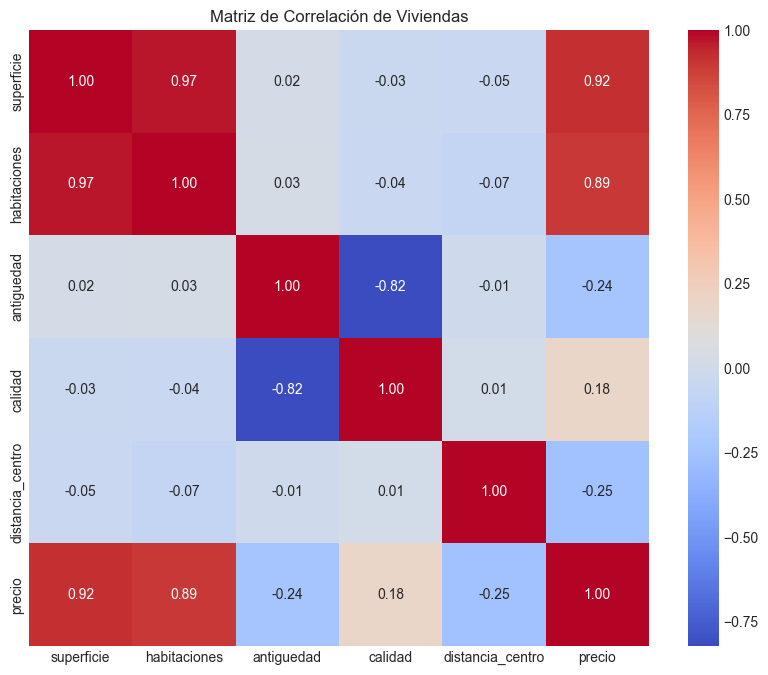

--- COMPARATIVA DE MODELOS ---
Modelo Completo:  R² = 0.9539 | Tiempo = 0.001767s
Modelo Reducido:  R² = 0.9537 | Tiempo = 0.001002s

Diferencia de R²: 0.000251 (Despreciable)


In [3]:
# Dataset de viviendas con features redundantes
rng = np.random.default_rng(42)
n = 500

superficie = rng.normal(100, 30, n)
habitaciones = superficie / 25 + rng.normal(0, 0.3, n)   # Correlacionada con superficie
antiguedad = rng.uniform(0, 50, n)
calidad = 10 - antiguedad / 10 + rng.normal(0, 1, n)      # Correlacionada con antigüedad
distancia_centro = rng.uniform(1, 30, n)

precio = (50000 + 1500 * superficie - 800 * antiguedad 
          - 1200 * distancia_centro + rng.normal(0, 10000, n))

df = pd.DataFrame({
    'superficie': superficie,
    'habitaciones': habitaciones,
    'antiguedad': antiguedad,
    'calidad': calidad,
    'distancia_centro': distancia_centro,
    'precio': precio
})

print(df.describe().round(1))

# Tu código aquí


# Matriz de Correlacion y Visualizacion
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación de Viviendas")
plt.show()

# Selección de Features
# Identificamos que 'superficie' y 'habitaciones' tienen corr > 0.85
# Como superficie tiene mayor corr con 'precio', eliminamos 'habitaciones'
features_todas = ['superficie', 'habitaciones', 'antiguedad', 'calidad', 'distancia_centro']
features_reducidas = ['superficie', 'antiguedad', 'calidad', 'distancia_centro']

X_todas = df[features_todas]
X_reduc = df[features_reducidas]
y = df['precio']

# Entrenamiento y Comparativa
# Modelo con todas las features
start = time.time()
model1 = LinearRegression().fit(X_todas, y)
t1 = time.time() - start
r2_1 = r2_score(y, model1.predict(X_todas))

# Modelo sin las redundantes
start = time.time()
model2 = LinearRegression().fit(X_reduc, y)
t2 = time.time() - start
r2_2 = r2_score(y, model2.predict(X_reduc))

# Resultados
print(f"--- COMPARATIVA DE MODELOS ---")
print(f"Modelo Completo:  R² = {r2_1:.4f} | Tiempo = {t1:.6f}s")
print(f"Modelo Reducido:  R² = {r2_2:.4f} | Tiempo = {t2:.6f}s")
print(f"\nDiferencia de R²: {abs(r2_1 - r2_2):.6f} (Despreciable)")


## 🔴 Ejercicio 9: Particiones Correctas de Datos

El capítulo 3.2 muestra que dividir los datos mal puede arruinar un modelo. Practica los dos casos especiales.

**Escenario A – Datos temporales (ventas diarias):**
1. Divide el dataset de ventas **aleatoriamente** con `train_test_split`. Muestra las fechas mín/máx de cada conjunto
2. ¿Aparecen fechas de test ANTES que fechas de train? (Eso es **leakage temporal**)
3. Haz una **división temporal correcta**: entrena con enero-septiembre, testea con octubre-diciembre
4. ¿Por qué la división temporal es obligatoria con datos de series temporales?

**Escenario B – Datos con grupos (múltiples registros por usuario):**
5. Divide `clientes` **aleatoriamente** y cuenta cuántos `usuario_id` aparecen en AMBOS conjuntos (usa operación de conjuntos: `set.intersection`)
6. Divide con `GroupShuffleSplit` y verifica que no hay overlap de usuarios
7. ¿Qué mide realmente cada tipo de división? (memorización vs generalización)

In [9]:
# Escenario A: Datos temporales de ventas
rng = np.random.default_rng(42)
fechas = pd.date_range('2023-01-01', periods=365, freq='D')
ventas = pd.DataFrame({
    'fecha': fechas,
    'ventas': 100 + np.cumsum(rng.standard_normal(365))
})

# Escenario B: Datos con grupos (múltiples registros por usuario)
n_usuarios = 50
registros_por_usuario = 8
clientes = pd.DataFrame({
    'usuario_id': np.repeat(np.arange(n_usuarios), registros_por_usuario),
    'gasto': rng.uniform(10, 500, n_usuarios * registros_por_usuario),
    'frecuencia': rng.integers(1, 10, n_usuarios * registros_por_usuario),
    'abandono': np.repeat(
        rng.choice([0, 1], n_usuarios, p=[0.8, 0.2]), registros_por_usuario
    )
})

print(f"Ventas: {len(ventas)} registros diarios")
print(f"Clientes: {len(clientes)} registros, {clientes['usuario_id'].nunique()} usuarios únicos")

# Tu código aquí

print("\nEscenario A")
# 1 y 2. División Aleatoria (Incorrecta para tiempo)
v_train_rand, v_test_rand = train_test_split(ventas, test_size=0.2, random_state=42)
print(f"VENTAS ALEATORIO: Test empieza en {v_test_rand['fecha'].min().date()} y Train termina en {v_train_rand['fecha'].max().date()}")

# 3. División Temporal (Correcta)
punto_corte = ventas['fecha'].iloc[int(len(ventas)*0.8)]
v_train_temp = ventas[ventas['fecha'] <= punto_corte]
v_test_temp = ventas[ventas['fecha'] > punto_corte]
print(f"VENTAS TEMPORAL: Train hasta {v_train_temp['fecha'].max().date()}, Test desde {v_test_temp['fecha'].min().date()}")

# Escenario B:
print("\nEscenario B")
# 5. División Aleatoria
c_train_rand, c_test_rand = train_test_split(clientes, test_size=0.2, random_state=42)
overlap = set(c_train_rand['usuario_id']).intersection(set(c_test_rand['usuario_id']))
print(f"CLIENTES ALEATORIO: Usuarios en ambos sets: {len(overlap)}")

# 6. GroupShuffleSplit (Correcta)
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(gss.split(clientes, groups=clientes['usuario_id']))
c_train_group = clientes.iloc[train_idx]
c_test_group = clientes.iloc[test_idx]

overlap_group = set(c_train_group['usuario_id']).intersection(set(c_test_group['usuario_id']))
print(f"CLIENTES POR GRUPO: Usuarios en ambos sets: {len(overlap_group)}")

Ventas: 365 registros diarios
Clientes: 400 registros, 50 usuarios únicos

Escenario A
VENTAS ALEATORIO: Test empieza en 2023-01-01 y Train termina en 2023-12-31
VENTAS TEMPORAL: Train hasta 2023-10-20, Test desde 2023-10-21

Escenario B
CLIENTES ALEATORIO: Usuarios en ambos sets: 43
CLIENTES POR GRUPO: Usuarios en ambos sets: 0


## 🔴 Ejercicio 10: Análisis Crítico - Dataset "Limpio" pero Inútil

**Escenario:** Dataset para predecir impago de créditos:
- 100,000 registros
- 0% valores nulos
- Sin duplicados
- Bien formateado

Pero tiene estos problemas:
- Solo incluye clientes ya aprobados (sesgo de selección)
- 98% "no impago", 2% "impago" (desbalanceo)
- Incluye variable "último_pago_realizado" (leakage)
- Todos datos de 2020-2021 (sesgo temporal)

Resultado: Modelo obtiene 98% accuracy, ¡pero es inútil!

**Tareas:**
1. Explica por qué es inútil a pesar de 98% accuracy
2. ¿Cuántos problemas hay? Enuméralos
3. Para cada problema, propone solución específica
4. ¿Cuál es el problema MÁS crítico y por qué?

In [ ]:
# Tu análisis aquí
# 1. Explica por qué es inútil a pesar de 98% accuracy
Debido a su accuracy ficticia, debido al desbalanceo, el modelo ha aprendido ha decir que nadie va a pagar. falla el 100% de los casos de impago, que precisamente son los que le cuesta el dinero al banco.
# 2. ¿Cuántos problemas hay? Enuméralos
1. Sesgo de seleccion
2. Desbalanceo critico
3.Leakage por falta de datos de impago
4. Sesgo temporal
# 3. Para cada problema, propone solución específica
1. Uitlizar solicitudes de datos extenernas para entender el perfil del mal pagador.
2. No utilizar Accuracy.Usar métricas como F1-Score o Precision-Recall.
3.Eliminar la variable inmediatamente. Esa información ocurre después de que se decide el crédito.
4. Ampliar el dataset con datos historicos para que el modelo vea ejemplos de impagos pasados para que pueda aprender.
# 4. ¿Cuál es el problema MÁS crítico y por qué?
El problema más crítico es el Data Leakage, porque el modelo está aprendiendo a predecir con información que en la vida real no tendría. Esto hace que el modelo sea completamente inútil en producción, ya que no podrá generalizar a casos reales donde esa información no esté disponible. 

---

## 📚 Resumen - Conceptos Clave Capítulos 3.1-3.2

### Cap. 3.1: Tipos y Formulación
- **Supervisado:** Regresión | Clasificación
- **No supervisado:** Clustering | Reducción
- **Refuerzo:** Recompensas
- **Formulación:** QUÉ, CUÁNDO, PARA QUÉ, COSTO

### Cap. 3.2: Datos y Sesgo
- **Sesgo selección:** Población no representada
- **Desbalanceo:** Clases desequilibradas
- **Leakage:** Información futura -> presente
- **Limpieza ≠ Calidad:** Dataset limpio puede ser terrible para ML

### Lecciones Críticas:

1. **Formulación Precisa**: Define QUÉ, CUÁNDO, PARA QUÉ, QUÉ CUESTA
2. **Sesgo de Selección**: Falta de grupos poblacionales completos
3. **Desbalanceo**: Clases con proporciones extremadamente diferentes
4. **Data Leakage**: Información futura infiltrada en features
5. **Tipos de Sesgo**: Medición, Confirmación, Supervivencia, Temporal
6. **Métricas Correctas**: En desbalanceo, Recall/F1 > Accuracy
7. **Limpieza ≠ Calidad**: Dataset sin nulls puede ser terrible para ML

### La Verdad Incómoda:
**"La mayoría de problemas en proyectos ML no están en el algoritmo. Están en los datos."**
**Los problemas de datos son invisibles pero letales: no lanzan excepciones, el modelo parece funcionar, pero falla silenciosamente en producción.**